# Librerias

In [31]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Dataset

In [21]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [22]:
train_data.shape

(60000, 28, 28)

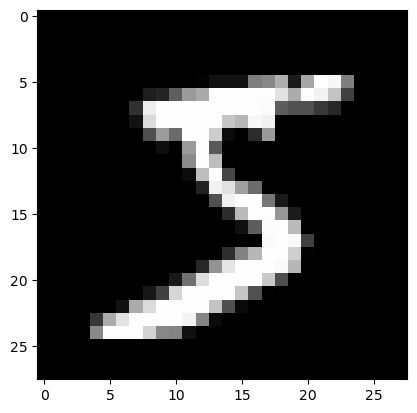

In [23]:
plt.imshow(train_data[0], cmap='gray')

In [24]:
train_labels[0]

5

nice

# Programando red neuronal

In [25]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

/home/riemannintegrable/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
X_train = train_data.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = test_data.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [29]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

magia:

In [34]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9999 - loss: 0.0011
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 1.0000 - loss: 6.5720e-04
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 1.0000 - loss: 4.7810e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 1.0000 - loss: 3.8488e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 1.0000 - loss: 3.0619e-04


In [35]:
model.evaluate(X_test, y_test)

I0000 00:00:1721451391.156463   41673 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0819


[0.06664658337831497, 0.9843999743461609]